In [1]:
%matplotlib inline

In [17]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_claudius #demo data

import pandas as pd
import glob
import numpy as np
#import surfe

In [18]:
data = pd.read_excel(r'C:\Users\ASUS\Desktop\loopstructural\data perthbasin\without_coord\perthbasin.xlsx')

In [19]:
data = data.rename(columns={'azimuth': 'strike', 'formation': 'feature_name'})

In [20]:
print(data)

                 X             Y            Z  val      strike       dip  \
0    393936.142320  6.693633e+06   957.702303    1  263.276747  1.193492   
1    396918.892567  6.693984e+06   977.204803    1   83.276747  0.349367   
2    351487.758871  6.688629e+06 -7385.646697    1   83.277000  6.546000   
3    338518.168564  6.650709e+06 -4542.306605    1  256.590252  1.789915   
4    397464.032464  6.663078e+06   959.378895    1  268.100891  1.432093   
..             ...           ...          ...  ...         ...       ...   
119  353033.649500  6.688811e+06 -5424.239697    5         NaN       NaN   
120  341942.065600  6.651525e+06 -4152.902105    5         NaN       NaN   
121  342823.407600  6.651735e+06 -4152.902105    5         NaN       NaN   
122  337375.397500  6.650011e+06 -1199.239105    5         NaN       NaN   
123  338177.661300  6.650617e+06 -1227.176105    5         NaN       NaN   

     polarity feature_name  
0         1.0      Permian  
1         1.0      Permian  


In [ ]:
data_claudius, bb_claudius = load_claudius()

In [ ]:
print(bb_claudius)

In [21]:
##extent_of_model = np.array([[ 340944.288072, 6637386.,  -7357.485252],
## [ 393936.142320,  6693633.,   957.702303]])

extent_of_model= np.array([[337000,6640000,-18000],  ##taken from extent of model in gempy
[400000,6710000,1000]])


In [22]:
print(extent_of_model[0,:])

[ 337000 6640000  -18000]


In [23]:
print(extent_of_model[1,:])

[ 400000 6710000    1000]


2021-10-14 12:42:02,167 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-14 12:42:02,167 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.
2021-10-14 12:42:02,167 ~ LoopStructural.visualisation.model_visualisation ~ ERROR      ~ Plot area has not been defined.



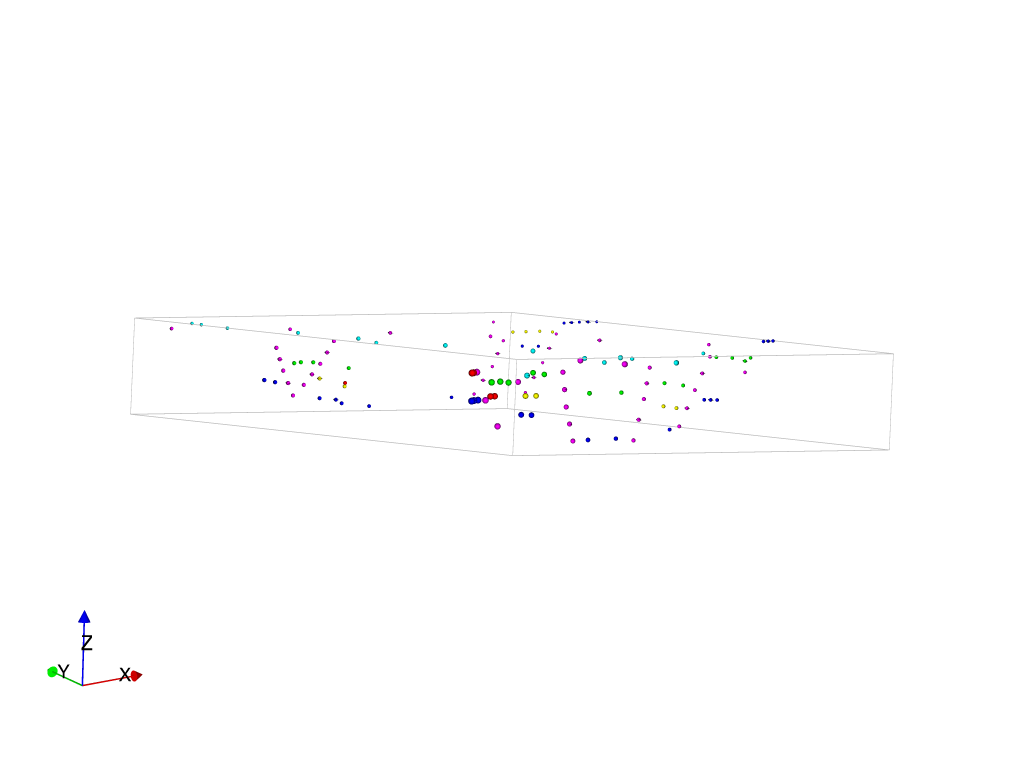

In [24]:
data['feature_name'].unique()

viewer = LavaVuModelViewer(background='white')
viewer.add_value_data(data[~np.isnan(data['val'])][['X','Y','Z']],data[~np.isnan(data['val'])]['val'],name='value points')
viewer.add_vector_data(data[~np.isnan(data['dip'])][['X','Y','Z']],
                       data[~np.isnan(data['strike'])][['X','Y','Z']],name='orientation points')
viewer.rotate([-85.18760681152344, 42.93233871459961, 0.8641873002052307])
viewer.display()

In [31]:
fault_displacement = 30.

model = GeologicalModel(extent_of_model[0,:],extent_of_model[1,:])
model.set_model_data(data)


fault_Coomallo = model.create_and_add_fault('Coomallo',
             fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype = float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                                            buffer = 0.5
                              # solver='pyamg'
                              )

formation_Permian = model.create_and_add_foliation('Permian',
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

#uc = model.add_unconformity(formation_Permian,1)




fault_Darling = model.create_and_add_fault('Darling',
                                fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype = float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                               buffer = 0.5
                              )



formation_Cretaceous   =    model.create_and_add_foliation('Cretaceous',
                              interpolatortype='FDI',
                               nelements=1e4,
                               buffer = 0.5
                              )


fault_Hypo_fault_E = model.create_and_add_fault('Hypo_fault_E',
                              fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype = float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                                buffer = 0.5
                              )


formation_Yarragadee  =    model.create_and_add_foliation('Yarragadee',
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

fault_Hypo_fault_W = model.create_and_add_fault('Hypo_fault_W',
                               fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype=float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                                buffer = 0.5
                              )


formation_Lesueur   =     model.create_and_add_foliation('Lesueur',
                              interpolatortype='FDI',
                               nelements=1e4,
                               buffer = 0.5
                              )


fault_Urella_North = model.create_and_add_fault('Urella_North',
                               fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype=float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,                 
                              interpolatortype='PLI',
                               nelements=1e4,
                                buffer = 0.5
                              )


formation_Eneabba   =   model.create_and_add_foliation('Eneabba',
                              interpolatortype='FDI',
                               nelements=1e4,
                                buffer = 0.5
                              )

fault_Urella_South = model.create_and_add_fault('Urella_South',
                            fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype=float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                                buffer = 0.5
                              )
fault_Abrolhos_Transfer = model.create_and_add_fault('Abrolhos_Transfer',
                           fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype=float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,
                              interpolatortype='PLI',
                               nelements=1e4,
                               buffer = 0.5
                              )

fault_Eneabba_south = model.create_and_add_fault('Eneabba_South',
                              fault_displacement, 
                            fault_slip_vector= np.array([0,1,2],dtype=float), 
                            fault_extent=2.,
                            fault_influence=6., 
                            fault_vectical_radius = 3.,                
                              interpolatortype='PLI',
                               nelements=1e4,
                            buffer = 0.5
                               )

model.update()


C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\numpy\linalg\linalg.py:2158: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


ValueError: all the input arrays must have same number of dimensions, but the array at index 0 has 1 dimension(s) and the array at index 1 has 2 dimension(s)

C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\LoopStructural\visualisation\model_visualisation.py:279: RuntimeWarning: Mean of empty slice
  mean_property_val = np.nanmean(val)#geological_feature.mean()
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\LoopStructural\visualisation\model_visualisation.py:280: RuntimeWarning: All-NaN slice encountered
  min_property_val = np.nanmin(val)#geological_feature.min()
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\LoopStructural\visualisation\model_visualisation.py:281: RuntimeWarning: All-NaN slice encountered
  max_property_val = np.nanmax(val)#geological_feature.max()
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\LoopStructural\visualisation\model_visualisation.py:314: RuntimeWarning: All-NaN slice encountered
  if isovalue > np.nanmax(val) or isovalue < np.nanmin(val):
2021-10-14 12:53:26,777 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot is

No surface found at the given iso value.
No surface found at the given iso value.
No surface found at the given iso value.


2021-10-14 12:53:26,984 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Hypo_fault_W at nan, skipping
2021-10-14 12:53:26,984 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Hypo_fault_W at nan, skipping
2021-10-14 12:53:26,984 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Hypo_fault_W at nan, skipping
2021-10-14 12:53:27,056 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Urella_North at 10, skipping
2021-10-14 12:53:27,056 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Urella_North at 10, skipping
2021-10-14 12:53:27,056 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Urella_North at 10, skipping
2021-10-14 12:53:27,117 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Urella_South at 10, skipping
2021-10-14 12:53:27,117 ~ LoopStructur

No surface found at the given iso value.
No surface found at the given iso value.
No surface found at the given iso value.
No surface found at the given iso value.


2021-10-14 12:53:27,176 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Abrolhos_Transfer at 10, skipping
2021-10-14 12:53:27,176 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Abrolhos_Transfer at 10, skipping
2021-10-14 12:53:27,176 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Abrolhos_Transfer at 10, skipping
2021-10-14 12:53:27,246 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Eneabba_South at 10, skipping
2021-10-14 12:53:27,246 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Eneabba_South at 10, skipping
2021-10-14 12:53:27,246 ~ LoopStructural.visualisation.model_visualisation ~ WARNING    ~ Cannot isosurface Eneabba_South at 10, skipping


No surface found at the given iso value.



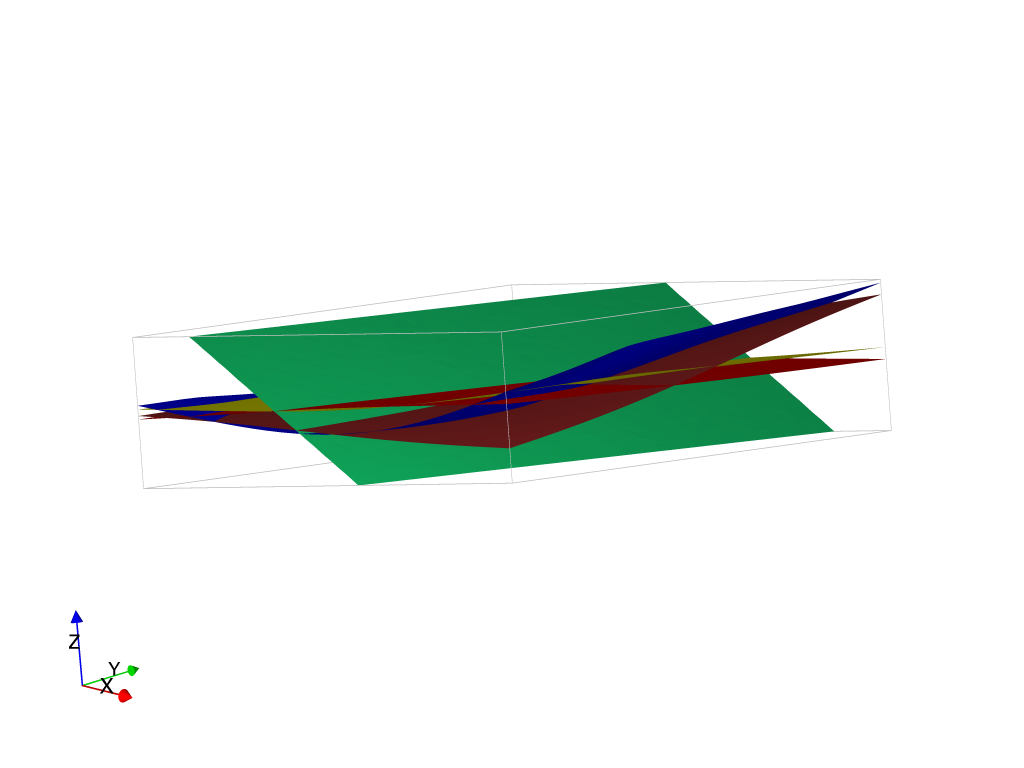

In [27]:
#model.update()

viewer = LavaVuModelViewer(model)


viewer.add_isosurface(formation_Permian,
#                       nslices=5
                     colour = 'blue'
                     ) ##slices=[2,1.5,1],





viewer.add_isosurface(formation_Cretaceous,
#                       nslices=5,
                      colour = 'red'
                     )


viewer.add_isosurface(formation_Yarragadee,
#                       nslices=5
                   colour = 'yellow'
                  )


viewer.add_isosurface(formation_Lesueur,
#                       nslices=5
                      colour = 'brown'
                     )



viewer.add_isosurface(formation_Eneabba,
#                       nslices=5
                      
                     paint_with=formation_Eneabba)




viewer.add_isosurface(fault_Coomallo,
#                       nslices=5
                     # isovalue=10,
                     paint_with=fault_Coomallo)


viewer.add_isosurface(fault_Darling,
                    # isovalue=10,
                     paint_with=fault_Darling)

viewer.add_isosurface(fault_Hypo_fault_E,
                 # isovalue=10,
                     paint_with=fault_Hypo_fault_E)

viewer.add_isosurface(fault_Hypo_fault_W,
                #  isovalue=10,
                     paint_with=fault_Hypo_fault_W)

viewer.add_isosurface(fault_Urella_North ,
                    isovalue=10,
                     paint_with=fault_Urella_North )

viewer.add_isosurface(fault_Urella_South,
                     isovalue=10,
                     paint_with=fault_Urella_South)

viewer.add_isosurface(fault_Abrolhos_Transfer,
                  isovalue=10,
                     paint_with=fault_Abrolhos_Transfer)


viewer.add_isosurface(fault_Eneabba_south,
                isovalue=10,
                     paint_with=fault_Eneabba_south)


viewer.rotate([-85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()



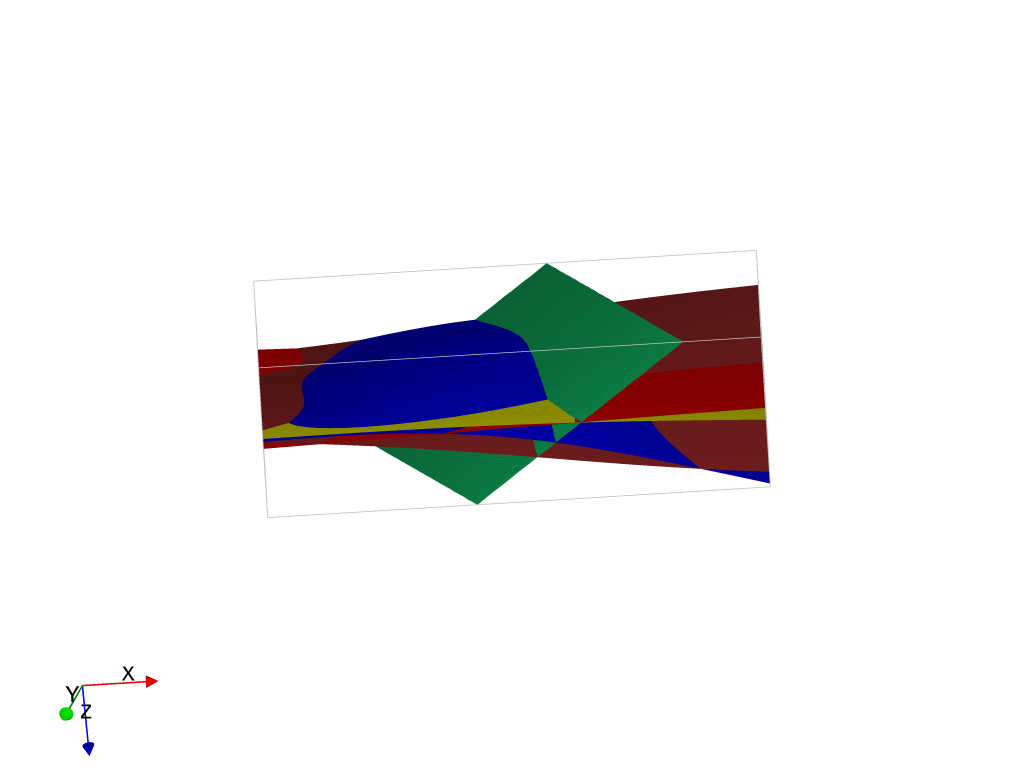

In [28]:
viewer.rotate([-175.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()


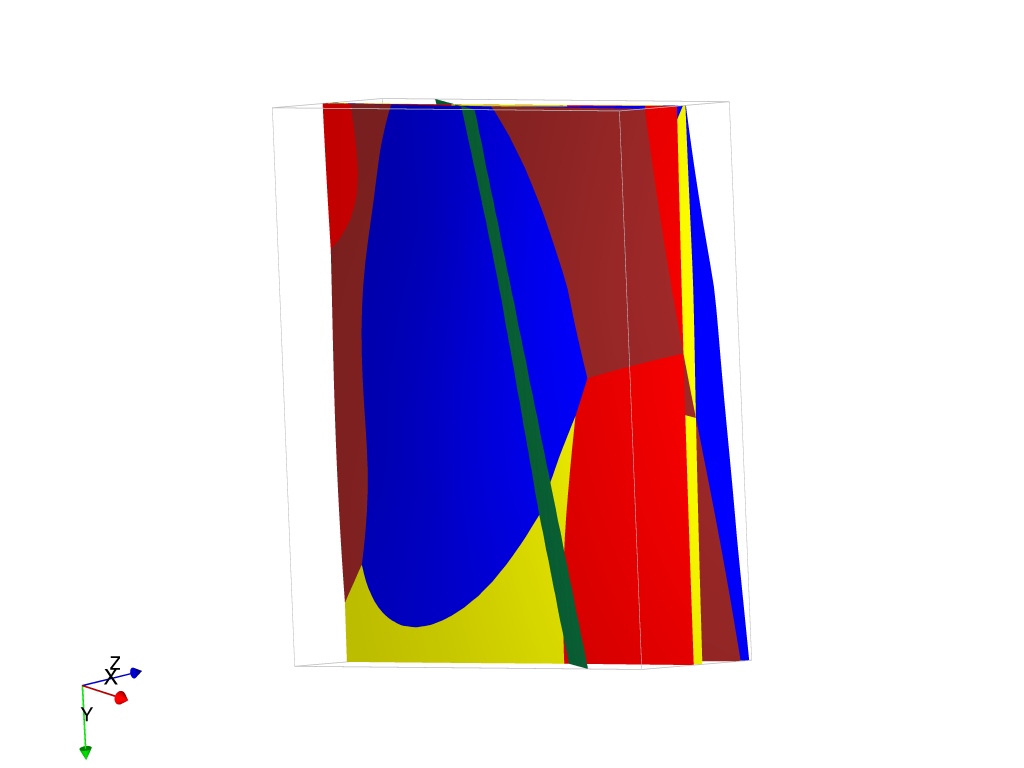

In [29]:
viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()


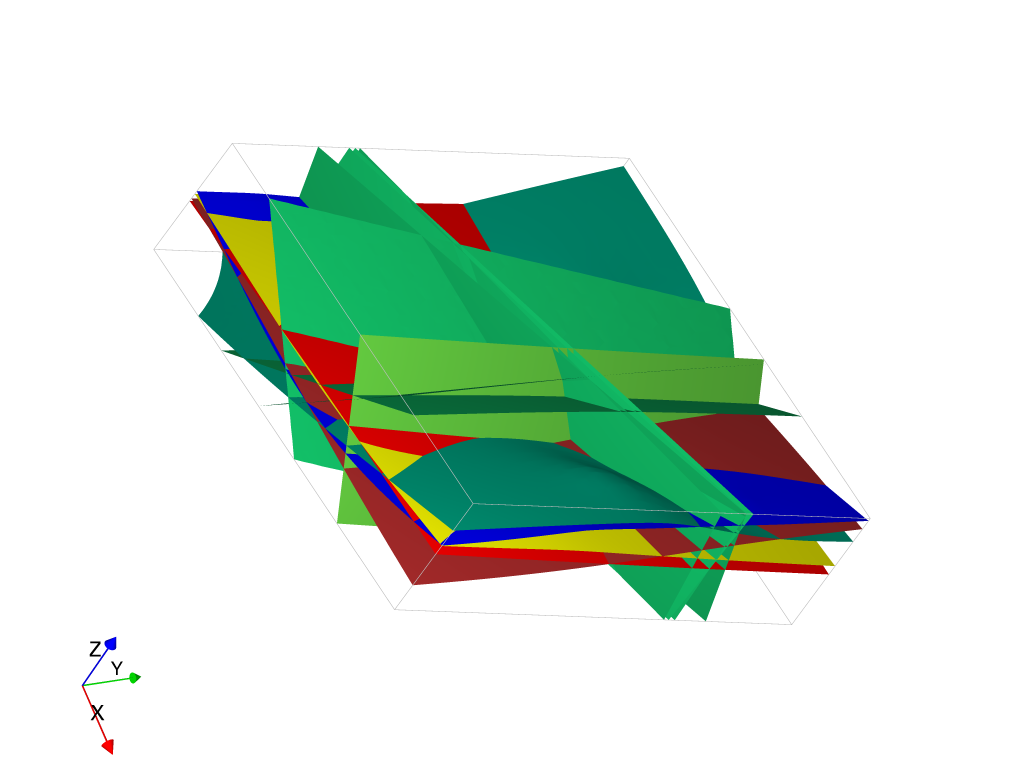

In [16]:
viewer.rotate([85.18760681152344, -42.93233871459961, 0.8641873002052307])
viewer.display()

In [ ]:
stratigraphic_column = {}
stratigraphic_column['Permian'] = {}
stratigraphic_column['Permian']['unit1'] = {'min':1,'max':10,'id':0}

stratigraphic_column['Coomallo'] = {}
stratigraphic_column['Coomallo']['unit2'] = {'min':-60,'max':0,'id':1}
stratigraphic_column['Coomallo']['unit3'] = {'min':-250,'max':-60,'id':2}
stratigraphic_column['Coomallo']['unit4'] = {'min':-330,'max':-250,'id':3}
stratigraphic_column['Coomallo']['unit5'] = {'min':-360,'max':-330,'id':4}



stratigraphic_column['Cretaceous'] = {}
stratigraphic_column['Cretaceous']['unit8'] = {'min':-490,'max':-450,'id':7}
stratigraphic_column['Cretaceous']['unit9'] = {'min':-520,'max':-490,'id':8}

stratigraphic_column['Yarragadee'] = {}
stratigraphic_column['Yarragadee']['unit10'] = {'min':-560,'max':-520,'id':9}
stratigraphic_column['Yarragadee']['unit11'] = {'min':-np.inf,'max':-560,'id':10}



In [ ]:
model.set_stratigraphic_column(stratigraphic_column)

viewer = LavaVuModelViewer(model)
viewer.add_model(cmap='tab20')
viewer.rotate([85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer.rotate([-85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_model_surfaces(cmap='tab20')
viewer.rotate([-85.18760681152344, -42.93233871459961, -0.8641873002052307])
viewer.display()